In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
c= pd.read_csv("loan-train.csv")

In [50]:
c.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# # To remove all the Empty PLace .


In [51]:
c['Gender'].fillna(c['Gender'].mode()[0],inplace=True)
c['Self_Employed'].fillna(c['Self_Employed'].mode()[0], inplace=True)
c['Married'].fillna(c['Married'].mode()[0], inplace=True)
c['Dependents'].fillna(c['Dependents'].mode()[0], inplace=True)
c['LoanAmount'].fillna(c['LoanAmount'].mean(), inplace=True)
c['Loan_Amount_Term'].fillna(c['Loan_Amount_Term'].mode()[0], inplace=True)             
c['Credit_History'].fillna(c['Credit_History'].mode()[0], inplace=True)
c.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
c['TotalIncome'] = c['ApplicantIncome'] + c['CoapplicantIncome']

<Axes: >

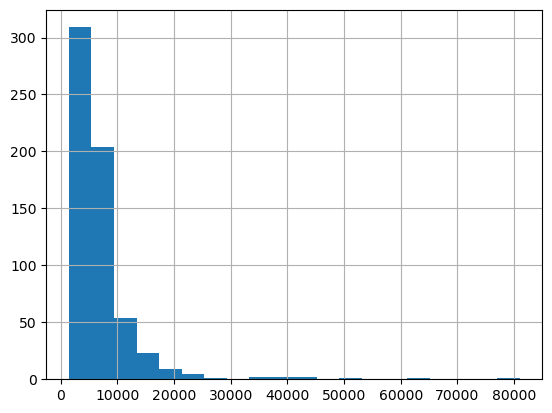

In [53]:
c['TotalIncome'].hist(bins=20)

In [54]:
c['TotalIncome_log'] = np.log(c['TotalIncome'])

<Axes: >

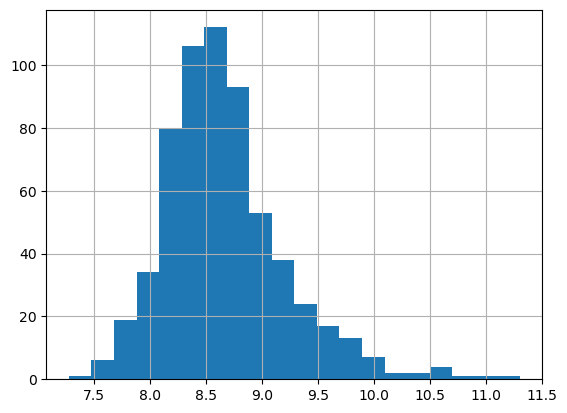

In [55]:
c['TotalIncome_log'].hist(bins=20)

In [56]:
# x have independent Variable
x = c.iloc[:, np.r_[1:5,9:11,13:15]].values

# y have only dependent variable
y = c.iloc[:, 12].values

## to split the data .

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [58]:
y_test

array(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
labelencoder_y = LabelEncoder()

In [60]:
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])


In [61]:
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

In [62]:
y_train = labelencoder_y.fit_transform(y_train)

In [63]:
for i in range(0,5):
  x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [64]:
y_test = labelencoder_y.fit_transform(y_test)



In [65]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [66]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


### Applying the algorithm decision 

In [92]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()

nbclassifier.fit(x_train,y_train)

GaussianNB()

In [93]:
y_pred = nbclassifier.predict(x_test)

In [94]:
print("The accuracy of decision tree by naive bayes algorithm is: ", metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree by naive bayes algorithm is:  0.8373983739837398


## TO test .

In [154]:
c= pd.read_csv("loan-test.csv")

In [155]:
c.head();

In [156]:
c['Gender'].fillna(c['Gender'].mode()[0],inplace=True)
c['Self_Employed'].fillna(c['Self_Employed'].mode()[0], inplace=True)
c['Married'].fillna(c['Married'].mode()[0], inplace=True)
c['Dependents'].fillna(c['Dependents'].mode()[0], inplace=True)
c['LoanAmount'].fillna(c['LoanAmount'].mean(), inplace=True)
c['Loan_Amount_Term'].fillna(c['Loan_Amount_Term'].mode()[0], inplace=True)             
c['Credit_History'].fillna(c['Credit_History'].mode()[0], inplace=True)
c.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [139]:
c['LoanAmount_log'] = np.log(c['LoanAmount'])

In [140]:
c['TotalIncome'] = c['ApplicantIncome'] + c['CoapplicantIncome']
c['TotalIncome_log'] = np.log(c['TotalIncome'])

In [141]:
test = c.iloc[:, np.r_[1:5,9:11,13:15]].values

In [142]:
for i in range(0,5):
    test[:,i] = labelencoder_x.fit_transform(test[:,i])
test[:,7] = labelencoder_x.fit_transform(test[:,7])
  

In [143]:
test=ss.fit_transform(test)

In [144]:
test

array([[ 0.        ,  1.41421356,  0.        ,  0.        ,  0.        ,
         0.70710678, -1.22693776, -1.22474487],
       [ 0.        , -0.70710678,  0.        ,  0.        ,  0.        ,
         0.70710678,  0.00439763,  0.        ],
       [ 0.        , -0.70710678,  0.        ,  0.        ,  0.        ,
        -1.41421356,  1.22254014,  1.22474487]])

In [145]:
prediction = nbclassifier.predict(test)

In [146]:
prediction 

array([1, 1, 0])

## The Y=yes for the application accepted and N = NO for the application regected .

In [162]:
predicted_labels = ['Y' if pred == 1 else 'N' for pred in prediction]
predicted_labels

['Y', 'Y', 'N']